<a href="https://colab.research.google.com/github/flaviorv/pb_ai_ml/blob/test/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Dataset

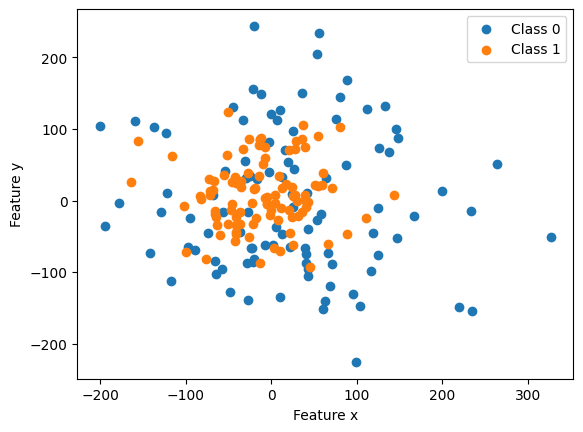

In [231]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#creating synthetic dataset; the higher the standard deviation (cluster_std), the harder it will be to classify
dataset = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=[100, 50])

#separating one feature to x and the other to y; separating the two features and the target
x = dataset[0][:, 0]
y = dataset[0][:, 1]
features = dataset[0]
target = dataset[1]

#chart showing the 2 clusters
plt.scatter(x[target==0], y[target==0])
plt.scatter(x[target==1], y[target==1])
plt.legend(['Class 0', 'Class 1'])
plt.xlabel('Feature x')
plt.ylabel('Feature y')
plt.show()

###Training with Decision Trees

###Imports and Custom Methods

In [232]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#method to apply the model with the best hyperparameters and returns cross val results
def classification(model, grid_params, features, target):
  grid_search = GridSearchCV(estimator=model, param_grid=grid_params)
  grid_search.fit(features, target)
  best_estimator = grid_search.best_estimator_
  best_score = grid_search.best_score_
  return best_estimator, best_score

#coordinates to plot the splits created by the decision tree
def line_coords(tree, x_min_max: tuple, y_min_max: tuple):
  coords = []
  features = tree.feature
  thresholds = tree.threshold
  for i in range(len(features)):
    if features[i] == 0:
      x0, x1 = thresholds[i], thresholds[i]
      coords.append(((x0, x1), y_min_max))
    elif features[i] == 1:
      y0, y1 = thresholds[i], thresholds[i]
      coords.append((x_min_max, (y0, y1)))
  return coords

#decision tree chart with divisions
def dt_chart(x, y, n_clusters, title, depth=None, accuracy=None, line_coords=None):
  for cluster in range(n_clusters):
    plt.scatter(x[target==cluster], y[target==cluster])
  for coord in line_coords:
    plt.plot(coord[0], coord[1])
  plt.legend(['Class 0', 'Class 1'])
  plt.xlabel('Feature x')
  plt.ylabel('Feature y')
  plt.title(f'{title} - Depth: {depth} - Accuracy {accuracy}')
  plt.show()

###Unpruned Decision Tree

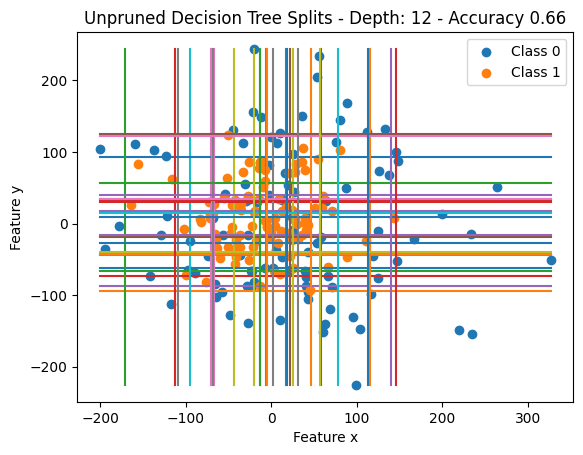

In [233]:
#model with default hyperparams (the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)
udt = DecisionTreeClassifier()

#training, validating and getting metrics
udt_metrics = classification(udt, {}, features, target)

#separating the obtained metrics
udt_coords = line_coords(udt_metrics[0].tree_, (min(x), max(x)), (min(y), max(y)))
udt_depth = udt_metrics[0].tree_.max_depth
udt_accuracy = round(udt_metrics[1], 2)

dt_chart(x, y, 2, 'Unpruned Decision Tree Splits', udt_depth, udt_accuracy, udt_coords)

###Pruned Decision Tree

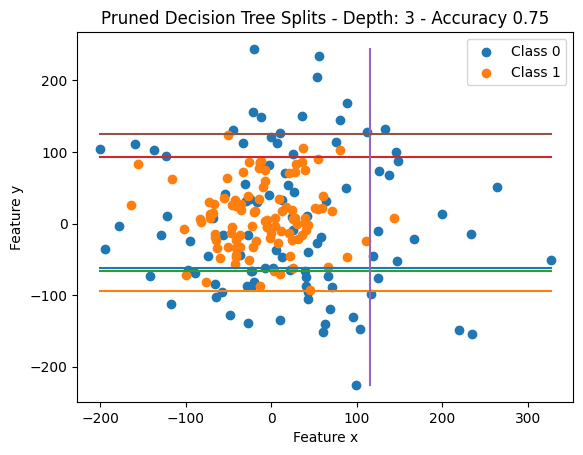

In [234]:
#pruning the decision tree can make the model more generalistic and faster (fewer levels, fewer decisions)
pdt = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 5, 7, 10]}

#training, validating and getting metrics
pdt_metrics = classification(pdt, param_grid, features, target)

#separating metrics
pdt_depth = pdt_metrics[0].tree_.max_depth
pdt_accuracy = round(pdt_metrics[1], 2)
pdt_coords = line_coords(pdt_metrics[0].tree_, (min(x), max(x)), (min(y), max(y)))

dt_chart(x, y, 2, 'Pruned Decision Tree Splits', pdt_depth, pdt_accuracy, pdt_coords)